<a href="https://colab.research.google.com/github/xychong/edgeaimonitoring/blob/main/ModelTraining/MobileNetV2_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.6.0

In [ ]:
!pip install keras==2.6.0

In [ ]:
# Import necessary libraries, packages and modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# Keras imports 
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, GlobalAveragePooling2D, Dense, Dropout, Flatten,
                                     Activation, BatchNormalization, Add, Reshape, DepthwiseConv2D)
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = np.load("/content/drive/MyDrive/FYP Data/Train and Test/train_data.npy", allow_pickle = True)
test_data = np.load("/content/drive/MyDrive/FYP Data/Train and Test/test_data.npy", allow_pickle = True)
train_label = np.load("/content/drive/MyDrive/FYP Data/Train and Test/train_label.npy", allow_pickle = True)
test_label = np.load("/content/drive/MyDrive/FYP Data/Train and Test/test_label.npy", allow_pickle = True)

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(2000, 224, 224, 3)
(500, 224, 224, 3)
(2000, 1)
(500, 1)


#### Model Training

In [ ]:
# Create base model from pre-trained model MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3), include_top=False)

# Freezing the convolutional base
# Prevents weights in a given layer from being updated during training 
base_model.trainable = False

x = Conv2D(16, kernel_size=(1,1), padding = 'same', data_format = 'channels_last')(base_model.output)

x = Dropout(0.3)(x)

x = GlobalAveragePooling2D()(x)  
  
outputs = Dense(5,'softmax')(x)

inputs = base_model.inputs
model = Model(inputs=inputs, outputs=outputs)
  
opt = Adam(learning_rate=0.0003)
# Labels are provided as integers -> Use sparse_categorical_crossentropy
model.compile(optimizer = opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
model.output_shape

(None, 5)

In [ ]:
training = model.fit(train_data, train_label, epochs= 20, validation_data=(test_data, test_label), verbose=1)

Epoch 1/20
63/63 [==============================] - 81s 1s/step - loss: 1.0809 - accuracy: 0.5995 - val_loss: 0.7002 - val_accuracy: 0.7920
Epoch 2/20
63/63 [==============================] - 81s 1s/step - loss: 0.5973 - accuracy: 0.8205 - val_loss: 0.5056 - val_accuracy: 0.8540
Epoch 3/20
63/63 [==============================] - 83s 1s/step - loss: 0.4618 - accuracy: 0.8550 - val_loss: 0.4140 - val_accuracy: 0.8860
Epoch 4/20
63/63 [==============================] - 85s 1s/step - loss: 0.3886 - accuracy: 0.8815 - val_loss: 0.3476 - val_accuracy: 0.9040
Epoch 5/20
63/63 [==============================] - 83s 1s/step - loss: 0.3412 - accuracy: 0.8905 - val_loss: 0.3176 - val_accuracy: 0.8980
Epoch 6/20
63/63 [==============================] - 84s 1s/step - loss: 0.2998 - accuracy: 0.9080 - val_loss: 0.2902 - val_accuracy: 0.9160
Epoch 7/20
63/63 [==============================] - 83s 1s/step - loss: 0.2773 - accuracy: 0.9165 - val_loss: 0.2578 - val_accuracy: 0.9320
Epoch 8/20
63/63 [==

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_label)

print("Tested Acc:", test_acc)

16/16 [==============================] - 16s 970ms/step - loss: 0.1552 - accuracy: 0.9440
Tested Acc: 0.9440000057220459


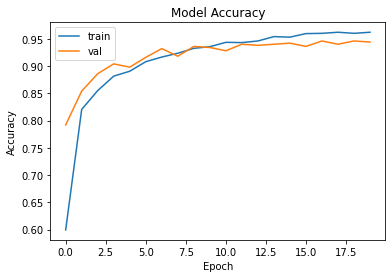

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

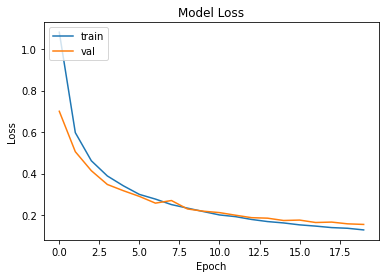

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_label_predict = model.predict(test_data)

In [ ]:
print(test_label_predict[0], np.argmax(test_label_predict[0]))

[7.0160562e-01 2.6893982e-01 3.8733983e-03 2.5384283e-02 1.9679285e-04] 0


In [ ]:
test_label_pred_array = []

count = 0
for item in test_label_predict:
  test_label_pred_array.append(np.argmax(test_label_predict[count]))
  count+=1

print(count)
#test_label_pred_array

500


In [ ]:
count = 0
sum = 0
for item in test_label_pred_array:
  if (test_label_pred_array[count] == test_label[count]):
    sum += 1
  else:
    sum += 0
  count+=1

print(sum/test_data.shape[0])

0.944


In [ ]:
print(test_label.shape)

(500, 1)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_label, test_label_pred_array)
print('Confusion Matrix\n')
confusion

Confusion Matrix



array([[97,  0,  0,  2,  1],
       [ 1, 99,  0,  0,  0],
       [ 1,  0, 93,  5,  1],
       [ 1,  0,  5, 92,  2],
       [ 0,  4,  1,  4, 91]])

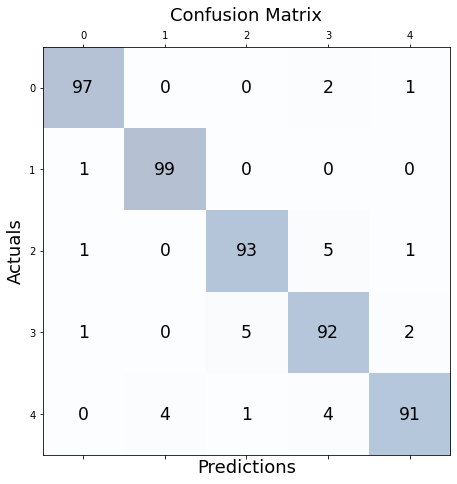

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i,s=confusion[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Precision = P/(TP+FP)
# Recall = TP/(TP+FN)
# F1 Score = (2 x precision x recall)/(precision + recall)
# Support: number of occurences of the class in the dataset
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_label, test_label_pred_array, target_names=['Ambience', 'Footsteps', 'Horn', 'Music', 'Shout']))


Classification Report

              precision    recall  f1-score   support

    Ambience       0.97      0.97      0.97       100
   Footsteps       0.96      0.99      0.98       100
        Horn       0.94      0.93      0.93       100
       Music       0.89      0.92      0.91       100
       Shout       0.96      0.91      0.93       100

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [ ]:
model.save('/content/drive/MyDrive/FYP/mobilenetv2_NEW3.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/mobilenetv2_NEW3.h5')

In [ ]:
test_loss, test_acc = new_model.evaluate(test_data, test_label)

print("Tested Acc:", test_acc)

16/16 [==============================] - 16s 980ms/step - loss: 0.1552 - accuracy: 0.9440
Tested Acc: 0.9440000057220459
